# Holiday Pacakge Prediction

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Travel.csv")

df.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [8]:
# in gender make only two categories - male /female & in marital status make only two categories - married / unmarried
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
#check missing values with features nan values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
#get the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  '% missing values')

Age 4.6236 % missing values
TypeofContact 0.5115 % missing values
DurationOfPitch 5.135 % missing values
NumberOfFollowups 0.9206 % missing values
PreferredPropertyStar 0.5319 % missing values
NumberOfTrips 2.8642 % missing values
NumberOfChildrenVisiting 1.3502 % missing values
MonthlyIncome 4.7668 % missing values


In [11]:
df[features_with_na].describe()  # check the mean and 50% values and if there is difference then only we have outliers

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing null values


In [12]:
#age - median
df.Age.fillna(df.Age.median(), inplace=True)

#type of contract - mode
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#duraction of pitch - median
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#number of followups - mode
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#prefereedproperty star - mode
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#number of trips - median
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#number of children visiting - mode
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#monthly income - median
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

C:\Users\pkmis\AppData\Local\Temp\ipykernel_15556\3090581048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
C:\Users\pkmis\AppData\Local\Temp\ipykernel_15556\3090581048.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
#drop customer id
df.drop('CustomerID', axis=1, inplace=True)

In [16]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature ENgineering

##### Feature Extraction

In [17]:
#total visiting = children + person
df['TotalVisits'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [18]:
#seaprate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits']
Categorical Features: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [19]:
#discrete features -- feeatures with values <=25
disc_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
print('Discrete Features:', disc_features)

Discrete Features: ['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisits']


In [20]:
#numerical features -- features with values >25 ie continuous
cont_features = [feature for feature in numerical_features if feature not in disc_features]
print('Continuous Features:', cont_features)

Continuous Features: ['Age', 'DurationOfPitch', 'MonthlyIncome']


##### Spliting

In [21]:
#traintest and model training
from sklearn.model_selection import train_test_split

X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']


In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
#separate to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((3910, 17), (978, 17))

### Handle Categorical features

In [26]:
cat_features = X.select_dtypes(include='O').columns
num_features = X.select_dtypes(exclude='O').columns
cat_features, num_features

(Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'),
 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
        'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
        'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits'],
       dtype='object'))

In [27]:
#onehot encoder, standar scaler, column transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

"""Column Transformer -> Applies transformers to columns of an array or pandas DataFrame."""

numeric_transformer = StandardScaler()
onehot_encoder = OneHotEncoder(drop="first")  #drop first means 


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", onehot_encoder, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits'],
      dtype='object'))])

In [29]:
X_train = preprocessor.fit_transform(X_train)  #apply transformation in training dataset(fit_transform)

X_train

array([[ 0.        ,  0.        ,  1.        , ..., -1.27997132,
        -0.40544782,  0.64680857],
       [ 0.        ,  0.        ,  1.        , ...,  0.7812675 ,
        -0.38566598, -0.77638868],
       [ 1.        ,  0.        ,  1.        , ...,  0.7812675 ,
         0.26638089, -1.48798731],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7812675 ,
        -0.91958706, -1.48798731],
       [ 1.        ,  0.        ,  1.        , ...,  0.7812675 ,
         0.85644468,  0.64680857],
       [ 1.        ,  0.        ,  0.        , ...,  0.7812675 ,
        -0.47477843,  0.64680857]], shape=(3910, 26))

In [30]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.389411,1.073130,0.292807,-0.731971,-0.680643,1.534062,1.406426,-1.279971,-0.405448,0.646809
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,0.521645,-0.680643,-0.651864,-0.052422,0.781268,-0.385666,-0.776389
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.707560,-0.276204,-0.705341,1.775261,-1.235083,-0.651864,1.406426,0.781268,0.266381,-1.487987
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,-0.731971,0.428238,-0.651864,-0.781845,-1.279971,-1.221778,-0.776389
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-0.644204,0.292807,-0.731971,-0.126203,1.534062,-1.511269,0.781268,-0.373797,0.646809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.459796,0.292807,-0.731971,0.982678,1.534062,-0.052422,0.781268,2.258317,0.646809
3906,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.486381,0.337130,0.292807,-0.731971,-0.126203,-0.651864,1.406426,-1.279971,0.014115,-0.064790
3907,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-1.134871,0.292807,-0.731971,-0.126203,-0.651864,-0.052422,0.781268,-0.919587,-1.487987
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.707560,1.931797,-0.705341,-0.731971,0.982678,1.534062,0.677002,0.781268,0.856445,0.646809


In [31]:
X_test = preprocessor.transform(X_test)   #apply transformation on test (transform)
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-1.134871,-0.705341,-0.731971,-1.235083,-0.651864,-0.781845,0.781268,-0.419013,-0.064790
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,1.073130,0.292807,1.775261,0.982678,1.534062,-0.052422,0.781268,0.767332,1.358407
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.276204,-0.705341,-0.731971,0.428238,-0.651864,0.677002,0.781268,-0.766608,-0.776389
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.707560,-1.134871,-0.705341,-0.731971,0.982678,-0.651864,-1.511269,0.781268,-0.597614,-0.776389
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.707560,2.177130,1.290954,-0.731971,0.982678,1.534062,-0.781845,0.781268,-0.088750,0.646809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.707560,-1.134871,-0.705341,-0.731971,0.982678,-0.651864,1.406426,0.781268,-1.006439,-0.776389
974,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.707560,0.091796,1.290954,-0.731971,-0.680643,-0.651864,-0.781845,0.781268,-0.171457,-0.776389
975,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.091796,-0.705341,-0.731971,-1.235083,-0.651864,-0.781845,-1.279971,-0.441055,-0.776389
976,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.707560,1.563797,-0.705341,0.521645,0.428238,-0.651864,0.677002,-1.279971,1.477406,-0.064790


## Model Training

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, roc_auc_score

In [33]:
# Define your models dictionary (you can add more models here)
models = {
    "Random Forest": RandomForestClassifier(), 
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Loop through the models
for model_name, model in models.items():
  print(f"\nEvaluating Model: {model_name}")

  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on both training and testing sets
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Calculate performance metrics for both sets
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  train_precision = precision_score(y_train, y_train_pred)
  train_recall = recall_score(y_train, y_train_pred)
  train_roc_auc = roc_auc_score(y_train, y_train_pred)

  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  test_precision = precision_score(y_test, y_test_pred)
  test_recall = recall_score(y_test, y_test_pred)
  test_roc_auc = roc_auc_score(y_test, y_test_pred)

  # Print performance metrics for both sets
  print('Training Set Performance:')
  print(f'Accuracy: {train_accuracy:.4f}')
  print(f'F1-score (weighted): {train_f1:.4f}')
  print(f'Precision: {train_precision:.4f}')
  print(f'Recall: {train_recall:.4f}')
  print(f'ROC AUC score: {train_roc_auc:.4f}')
  print('-------------------------------------------------')
  print('\nTesting Set Performance:')
  print(f'Accuracy: {test_accuracy:.4f}')
  print(f'F1-score (weighted): {test_f1:.4f}')
  print(f'Precision: {test_precision:.4f}')
  print(f'Recall: {test_recall:.4f}')
  print(f'ROC AUC score: {test_roc_auc:.4f}')
  
  print('***************************************************')


Evaluating Model: Random Forest
Training Set Performance:
Accuracy: 1.0000
F1-score (weighted): 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC score: 1.0000
-------------------------------------------------

Testing Set Performance:
Accuracy: 0.9284
F1-score (weighted): 0.9223
Precision: 0.9661
Recall: 0.6333
ROC AUC score: 0.8142
***************************************************

Evaluating Model: Decision Tree
Training Set Performance:
Accuracy: 1.0000
F1-score (weighted): 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC score: 1.0000
-------------------------------------------------

Testing Set Performance:
Accuracy: 0.9346
F1-score (weighted): 0.9335
Precision: 0.8494
Recall: 0.7833
ROC AUC score: 0.8760
***************************************************

Evaluating Model: Logistic Regression
Training Set Performance:
Accuracy: 0.8450
F1-score (weighted): 0.8198
Precision: 0.7043
Recall: 0.3122
ROC AUC score: 0.6408
-------------------------------------------------

Testing Se

#### Perform hyperparameter tuning with Rforest

In [34]:
rf_params = {"max_depth": [5,8,15,20, None, 10],
             "max_features":[5,6,7,"auto", 8],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,200,500,1000]}

In [35]:
rf_params

{'max_depth': [5, 8, 15, 20, None, 10],
 'max_features': [5, 6, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [36]:
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]

In [37]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 20, None, 10],
   'max_features': [5, 6, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [38]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1)
    random.fit(X_train, y_train)
    
    model_param[name] = random.best_params_
    
    
for model_name in model_param:
    print(f"---------------Best Params for {model_name}--------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=6, min_samples_split=8, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=6, min_samples_split=8, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=6, min_samples_split=8, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=6, min_samples_split=15, n_estimators=500; total time=   2.3s
[CV] END max_depth=20, max_features=6, min_samples_split=15, n_estimators=500; total time=   2.5s
[CV] END max_depth=20, max_features=6, min_samples_split=15, n_estimators=500; total time=   2.5s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_est

e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
51 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_par

---------------Best Params for RF--------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 20}


In [40]:
# again train the model  with best params

# Define your models dictionary (you can add more models here)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200,
                                            min_samples_split = 2,
                                            max_features=8,
                                            max_depth=20), 
    
}

# Loop through the models
for model_name, model in models.items():
  print(f"\nEvaluating Model: {model_name}")

  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on both training and testing sets
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Calculate performance metrics for both sets
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_f1 = f1_score(y_train, y_train_pred, average='weighted')
  train_precision = precision_score(y_train, y_train_pred)
  train_recall = recall_score(y_train, y_train_pred)
  train_roc_auc = roc_auc_score(y_train, y_train_pred)

  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred, average='weighted')
  test_precision = precision_score(y_test, y_test_pred)
  test_recall = recall_score(y_test, y_test_pred)
  test_roc_auc = roc_auc_score(y_test, y_test_pred)

  # Print performance metrics for both sets
  print('Training Set Performance:')
  print(f'Accuracy: {train_accuracy:.4f}')
  print(f'F1-score (weighted): {train_f1:.4f}')
  print(f'Precision: {train_precision:.4f}')
  print(f'Recall: {train_recall:.4f}')
  print(f'ROC AUC score: {train_roc_auc:.4f}')
  print('-------------------------------------------------')
  print('\nTesting Set Performance:')
  print(f'Accuracy: {test_accuracy:.4f}')
  print(f'F1-score (weighted): {test_f1:.4f}')
  print(f'Precision: {test_precision:.4f}')
  print(f'Recall: {test_recall:.4f}')
  print(f'ROC AUC score: {test_roc_auc:.4f}')
  
  print('***************************************************')


Evaluating Model: Random Forest
Training Set Performance:
Accuracy: 1.0000
F1-score (weighted): 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC score: 1.0000
-------------------------------------------------

Testing Set Performance:
Accuracy: 0.9376
F1-score (weighted): 0.9338
Precision: 0.9474
Recall: 0.7000
ROC AUC score: 0.8456
***************************************************


-- Before
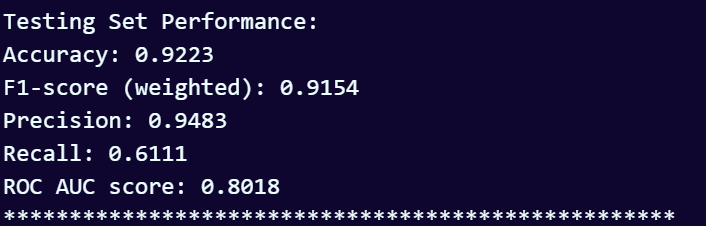

-- After
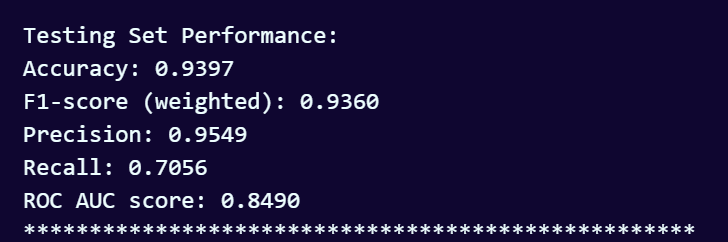

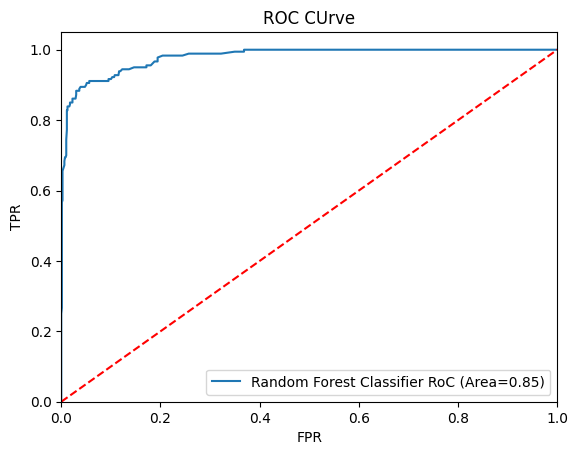

In [50]:
#Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

#add modles
auc_models =[ {
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=200,
                                            min_samples_split = 2,
                                            max_features=8,
                                            max_depth=20),
    'auc': 0.8456
},
]

#create loop thrrough all model
for algo in auc_models:
    model = algo['model']  #selection of model
    model.fit(X_train,y_train)
    
    #compute FPR and TPR
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #calculate area under curve
    plt.plot(fpr, tpr, label='%s RoC (Area=%0.2f)' % (algo['label'], algo['auc']))
    
    
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CUrve')
plt.legend(loc="lower right")
plt.savefig('auc_curve.png')
plt.show()